# 図 8.1 の生成

In [ ]:
! pip install POT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot

In [2]:
# データの生成
np.random.seed(0)
x1 = np.random.rand(20, 2)
x2 = np.random.rand(30, 2) + np.array([0, 2])
x3 = np.random.rand(50, 2) + np.array([1, 1])
x = np.concatenate([x1, x2, x3])
a = np.ones(len(x)) / len(x)

In [3]:
 # メッシュ（= サポート）の生成
g1, g2 = np.meshgrid(np.linspace(0, 2, 10), np.linspace(0, 3, 10))
y = np.hstack([g1.reshape(-1, 1), g2.reshape(-1, 1)])
b = np.ones(len(y)) / len(y)

[]

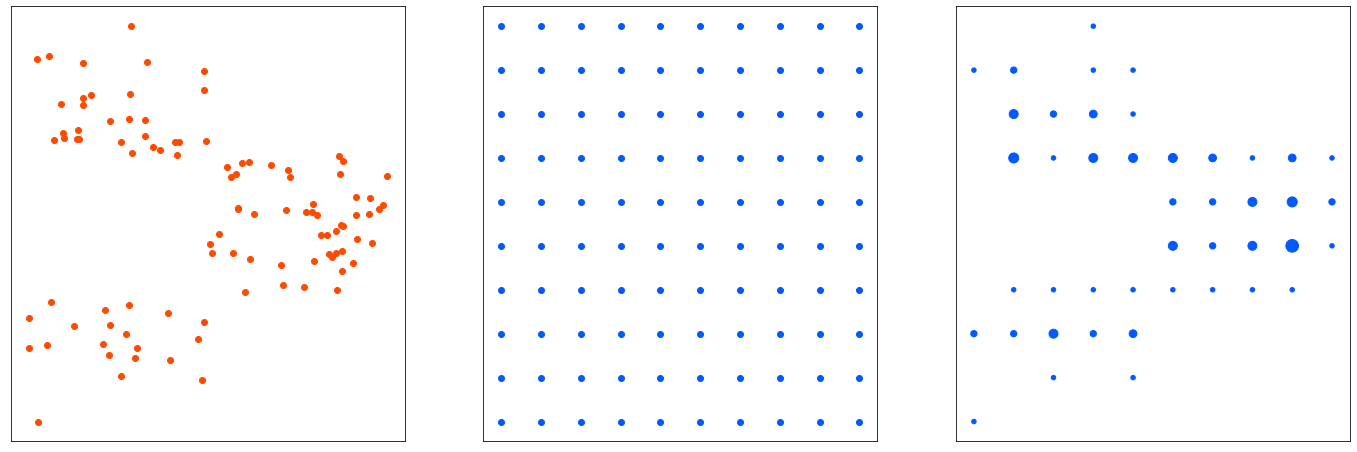

In [4]:
fig = plt.figure(figsize=(24, 8))

# データの描画
ax = fig.add_subplot(1, 3, 1)
ax.scatter(x[:, 0], x[:, 1], c='#ff4b00')
ax.set_xticks([])
ax.set_yticks([])

# サポートの描画
ax = fig.add_subplot(1, 3, 2)
ax.scatter(y[:, 0], y[:, 1], c='#005aff')
ax.set_xticks([])
ax.set_yticks([])

C = np.linalg.norm(x.reshape(-1, 1, 2) - y.reshape(1, -1, 2), axis=2) ** 2 # コスト行列
n, m = C.shape
b = np.zeros(m)
for i in range(n):
    j = np.argmin(C[i])
    b[j] += a[i] # 再近傍に輸送（式 8.9）

# ワッサースタイン重心の描画
ax = fig.add_subplot(1, 3, 3)
ax.scatter(y[:, 0], y[:, 1], c='#005aff', s=b*2000)
ax.set_xticks([])
ax.set_yticks([])